# MSFT Stock Analysis

This notebook performs an analysis of Microsoft stock.

The first code cell are used for imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and Subset

Data is loaded and subset such that the data frame contains only data from the past two years.

In [2]:
df = pd.read_csv("data/MSFT_A1a.csv")
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")

# Subset to only include last two full calendar years (2023-2024)
df_subset = df[(df["Date"] >= "2023-01-01") & (df["Date"] <= "2024-12-31")]
df_subset.set_index("Date", inplace=True)

df = df_subset

df


,Close,High,Low,Open,Volume
Date,,,,,
2023-09-20,NaN,325.230600,316.270712,325.151671,21436500.0
2023-12-29,371.819427,372.926852,369.288163,371.779868,18723000.0
2024-04-08,420.600830,423.265559,419.322942,421.175398,14272400.0
2023-10-30,332.848480,334.960189,327.440952,329.000071,22828100.0
2024-11-14,424.405548,425.678097,417.555633,422.526533,30246900.0
...,...,...,...,...,...
2023-01-18,231.113998,237.553168,230.829780,236.759301,30028700.0
2023-12-19,369.070557,369.070557,365.688929,367.320404,20603700.0
2024-12-20,434.927887,442.040526,426.988410,431.451233,64263700.0


## Clean

Data is sorted by date, duplicates are drop, then the mising data are handle as per rules below.

When data is mising:

- `Open` forward fill 
- `Close` backward fill
- `High` and `Low` linear interpolation
- `Volume` fill with mean

In [3]:
#Sort by date
df.sort_index(inplace=True)
df.index.is_monotonic_increasing

# Drop duplicates
df.drop_duplicates(inplace=True)

# Open foward fill
df.Open = df.Open.ffill()

# Close backward fill
df.Close = df.Close.bfill()

# High and Low linear interpolation
df.High = df.High.interpolate(method="linear")
df.Low = df.Low.interpolate(method="linear")

# Fill volume with mean open
df.Open = df.Open.fillna(df.Open.median())

df



,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,234.808960,240.856088,232.672365,238.239260,25740000.0
2023-01-04,224.537674,228.232587,221.460205,227.654340,50623400.0
2023-01-05,217.882874,223.018529,217.343823,222.675493,39585600.0
2023-01-06,220.450699,221.264172,214.981833,218.559140,43613600.0
2023-01-09,222.597061,226.635024,221.901209,221.940406,27369800.0
...,...,...,...,...,...
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500.0
2024-12-26,436.432068,439.251246,434.957756,437.398354,8194200.0
2024-12-27,428.881104,433.553144,424.717120,432.935523,18117700.0


## Returns

The simple daily return are calculated using the formula

$$ (close price_{today} - close price_{yesterday}) / close price_{yesterday} $$

applying this to the close prices, the simple daily returns are:

In [4]:
df["Returns"] = df.Close.pct_change()
df

,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2023-01-03,234.808960,240.856088,232.672365,238.239260,25740000.0,NaN
2023-01-04,224.537674,228.232587,221.460205,227.654340,50623400.0,-0.043743
2023-01-05,217.882874,223.018529,217.343823,222.675493,39585600.0,-0.029638
2023-01-06,220.450699,221.264172,214.981833,218.559140,43613600.0,0.011785
2023-01-09,222.597061,226.635024,221.901209,221.940406,27369800.0,0.009736
...,...,...,...,...,...,...
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500.0,0.009374
2024-12-26,436.432068,439.251246,434.957756,437.398354,8194200.0,-0.002777
2024-12-27,428.881104,433.553144,424.717120,432.935523,18117700.0,-0.017302


## Moving Average and Standard Deviation

The price simple moving average is calculated and a window size of 20 is used.

In [5]:
df["MA20"] = df.Close.rolling(20).mean()
df

,Close,High,Low,Open,Volume,Returns,MA20
Date,,,,,,,
2023-01-03,234.808960,240.856088,232.672365,238.239260,25740000.0,NaN,NaN
2023-01-04,224.537674,228.232587,221.460205,227.654340,50623400.0,-0.043743,NaN
2023-01-05,217.882874,223.018529,217.343823,222.675493,39585600.0,-0.029638,NaN
2023-01-06,220.450699,221.264172,214.981833,218.559140,43613600.0,0.011785,NaN
2023-01-09,222.597061,226.635024,221.901209,221.940406,27369800.0,0.009736,NaN
...,...,...,...,...,...,...,...
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500.0,0.009374,437.669812
2024-12-26,436.432068,439.251246,434.957756,437.398354,8194200.0,-0.002777,438.173874
2024-12-27,428.881104,433.553144,424.717120,432.935523,18117700.0,-0.017302,438.549431


## Bollinger Bands

The upper and lower Bollinger Bands.

In [6]:
# Adding these as features so the calculation of the Bollinger Bands is easier
df['SMA'] = df['Close'].rolling(window=20).mean()
df['Dev'] = df['Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

df


,Close,High,Low,Open,Volume,Returns,MA20,SMA,Dev,HighBand,LowBand
Date,,,,,,,,,,,
2023-01-03,234.808960,240.856088,232.672365,238.239260,25740000.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,224.537674,228.232587,221.460205,227.654340,50623400.0,-0.043743,NaN,NaN,NaN,NaN,NaN
2023-01-05,217.882874,223.018529,217.343823,222.675493,39585600.0,-0.029638,NaN,NaN,NaN,NaN,NaN
2023-01-06,220.450699,221.264172,214.981833,218.559140,43613600.0,0.011785,NaN,NaN,NaN,NaN,NaN
2023-01-09,222.597061,226.635024,221.901209,221.940406,27369800.0,0.009736,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500.0,0.009374,437.669812,437.669812,8.997081,455.663973,419.675651
2024-12-26,436.432068,439.251246,434.957756,437.398354,8194200.0,-0.002777,438.173874,438.173874,8.603343,455.380561,420.967187
2024-12-27,428.881104,433.553144,424.717120,432.935523,18117700.0,-0.017302,438.549431,438.549431,7.971978,454.493387,422.605475


## Price Surge

The days with a price surge is identified. A surge is defined by a price that is *higher than* a threshold **5 standard deviations above the mean**.

In [7]:
mean_return = df.Returns.mean()
threshold = mean_return + df.Returns.std() * 5

condition = df.Returns > threshold
df[condition]

,Close,High,Low,Open,Volume,Returns,MA20,SMA,Dev,HighBand,LowBand
Date,,,,,,,,,,,


## Note
No trading day met the price surge threshold when defined as 5 standard deviations above the mean daily return. However, if the threshold is adjusted to 3 standard deviations, two days qualify as surge events: February 2, 2023 and April 26, 2023. The highest daily return during the period was 7.24%, recorded on April 26, 2023.

## Close Price Plot

Close price with its 20-day moving average and Bollinger Bands plot.

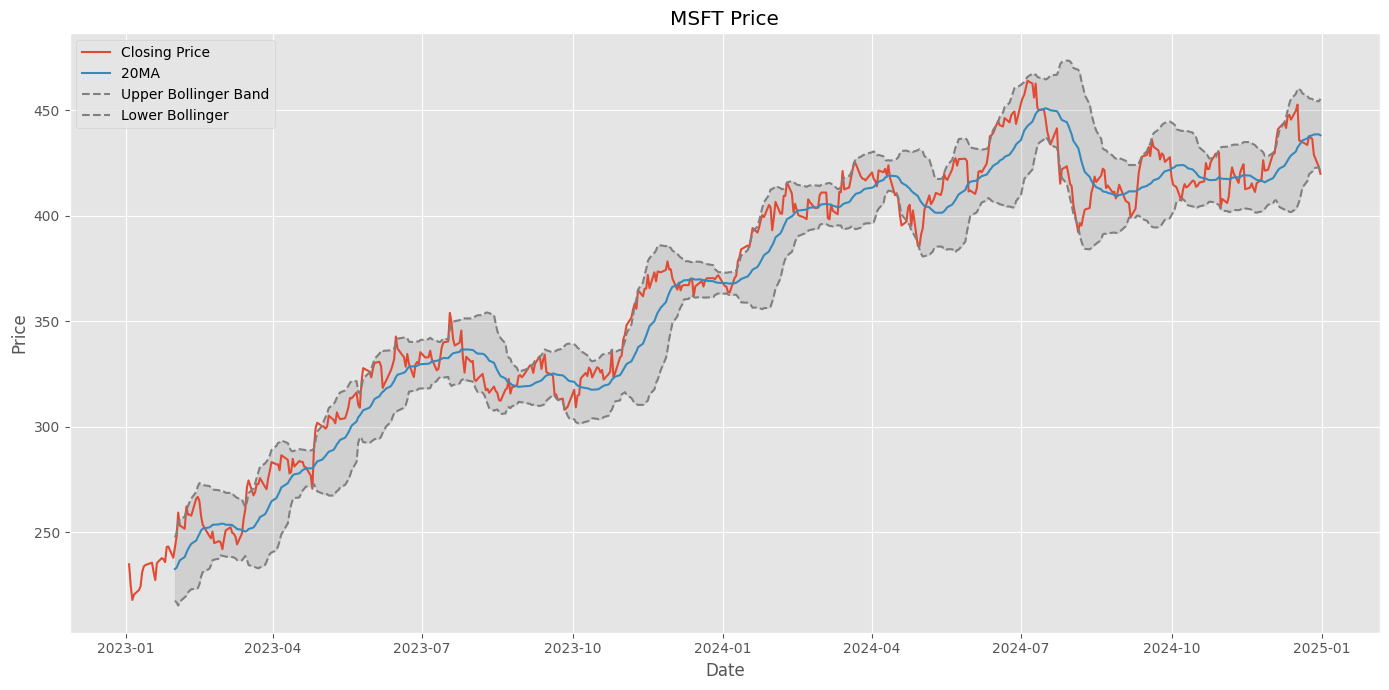

In [8]:
plt.style.use("ggplot")

plt.figure(figsize=(14,7))
plt.plot(df.Close, label="Closing Price")
plt.plot(df.MA20, label="20MA")

plt.plot(df.HighBand, color="grey", linestyle="--", label="Upper Bollinger Band")
plt.plot(df.LowBand, color="grey", linestyle="--", label="Lower Bollinger")
plt.fill_between(df.index, df.HighBand, df.LowBand, color="grey", alpha=0.2)

plt.title("MSFT Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()

## Returns Histogram

Histogram for simple daily returns.

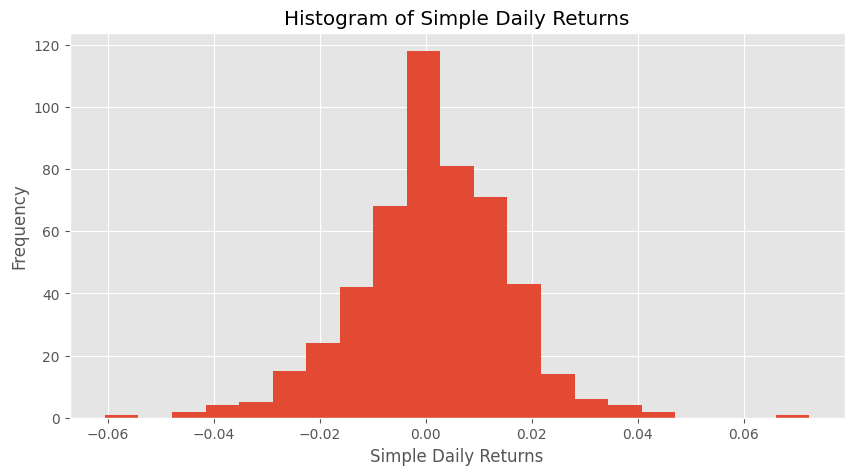

<Figure size 640x480 with 0 Axes>

In [9]:
plt.style.use("ggplot")

plt.figure(figsize=(10, 5))
plt.hist(df.Returns, bins=21)
plt.title("Histogram of Simple Daily Returns")
plt.ylabel("Frequency")
plt.xlabel("Simple Daily Returns")
plt.grid(True)
plt.show()
plt.tight_layout()

## Volume and Returns

Scatter plot showing Volume vs Simple Daily Returns

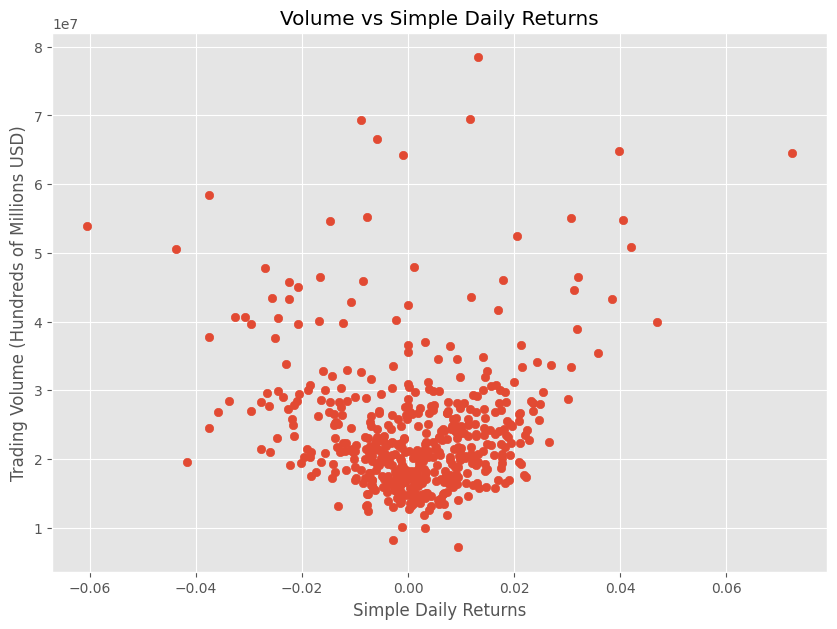

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(df.Returns, df.Volume)
plt.title("Volume vs Simple Daily Returns")
plt.ylabel("Trading Volume (Hundreds of Millions USD)")
plt.xlabel("Simple Daily Returns")
plt.grid(True)
plt.show()
plt.tight_layout()

## Report Writing

Based on the above analysis and visualisations, write a 2-4 paragraph report below summarising your findings to provide a recommendation on whether the firm should increase its stake in MSFT.





## MSFT Investment Analysis
My analysis of Microsoft stock performance over the recent two full calendar years, 2023 to 2024, shows a consistently strong and stable equity. Throughout the two years, closing prices showed steady growth, with the 20-day simple moving average moving relatively closely to the actual price movement, showing that the short-term momentum remained consistent with market expectations. The Bollinger Band further supports this stability, with prices rarely approaching the upper or lower bounds, showing low price volatility, moderate risk and disciplined investor sentiment.

There was no surge in price in both 2023 and 2024, no single day return met the defined ‘surge’ threshold of change of exceeding 5 standard deviations above the mean, showing that the price spikes and gains throughout the years are within a statically expected range. This suggests a lack of abnormal or speculative behavior, making the stock even more attractive for risk-conscious investors. Additionally, the histogram of daily returns showed a near-normal distribution, centered around positive returns. The scatter plot comparing daily returns to trading volume revealed no significant correlation, indicating that price movements were largely driven by fundamentals rather than high volume speculation.

## Recomendations
Based on this comprehensive review, I would recommend the investment firm to increase the stake in Microsoft. The stock’s consistent uptrend, low volatility and absence of speculative spikes makes MSFT a robust, long-term asset within a balanced portfolio.